# Tools
---

## Diagrama de sintaxis

* Son grafos dirigidos donde los elementos no terminales de la GIC aparecen como rectángulos y los terminales como círculos o elipses
* Todo diagrama de sintaxis se supone que tiene un origen y un destino, aunque no se dibujan (se supone que el origen está a la izquierda y el destino a la derecha)

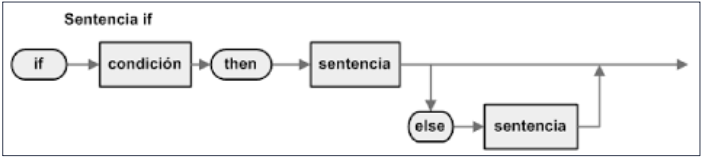

* Ejemplo: $$Sentencia \rightarrow Identificador \, = \, Número$$

```
---->[Identificador]---->(=)---->[Número]---->
```

In [1]:
def secuencia():
    if token == Identificador: 
        token = getToken()
    elif token == IGUAL: 
        token = getToken()
    elif token == Numero: 
        token = getToken()
    else: 
        error()

* Ejemplo: $$Sentencia \rightarrow (Sentencia \, ; \,)^+$$

```
-----------------------------
|                           ^ 
v                           |
---->[Sentencia]---->(;) ------->
```

In [3]:
def secuencia():
    token = getToken();
    while token != EOF:
      sentencia()
      while (token != PUNTOCOMA):
        error(); 
        token = getToken()
      token = getToken()

## Tools(Parser(Languages(Program)))

* Un desarrollador está expuesto a un número creciente de tecnología de parsing:
  * (mini) Herramientas
    * Pretty Print (... a colores!!)
    * Autocompletado de código
    * AI (Copilot,  Tabnine, Kite)
  * Herramientas
    * Refactoring
    * Crítica de Código y CodeSmells
    * Source Base Project Analytics

* Por ejemplo: Como se implementa el formateo automático o los colores en el código fuente?

* Programa: al menos un lenguaje
* Lenguajes: Gramática (sintaxis+) y Semántica de operación (y denotativa)
* Parsers
  * "Analizan" la validez de un texto como programa
  * Consideran la gramática de un lenguaje
  * Se basan en el AST (abstract syntax trees)
* Herramientas
  * Analizar/Mantener/Documentar
  * Refactorizar/Optimizar
  * Migrar/Reescribir

## CUP

* Constructor of Useful Parsers  
* Genera analizadores sintácticos LALR (LookAhead LR)
* Genera código Java y permite introducir acciones semánticas escritas en dicho lenguaje

* Declaraciones **JLex**:

```
import java_cup.runtime.Symbol;
%%
%full
%notunix
%cup
%%
[\r\n\t ]+ {/*prescindir de blancos*/}
"+" { return new Symbol (sym.SUMA); }
"-" { return new Symbol (sym.RESTA); }
"*" { return new Symbol (sym.MULTIPLICACION); }
"/" { return new Symbol (sym.DIVISION); }
"^" { return new Symbol (sym.POTENCIA); }
"(" { return new Symbol (sym.LPARENT); }
")" { return new Symbol (sym.RPARENT); }
"=" { return new Symbol (sym.RESULTADO); }
[0-9]+ {return new Symbol (sym.ENTERO, new Integer (yytext())); }
[^0-9\r\n\t \+\-\*"^"/]+ { System.out.println("Error léxico: "+ yytext() ); }
```

* Declaraciones **CUP**

```
// terminales y no terminales
terminal SUMA, RESTA,DIVISION,MULTIPLICACION;
terminal Integer ENTERO;
terminal POTENCIA, RESULTADO, LPARENT, RPARENT, SIGNO;
non terminal sesion, ecuacion;
non terminal Integer expresion;
precedence left RESTA, SUMA;
precedence left MULTIPLICACION, DIVISION;
precedence right SIGNO;
// gramática
sesion ::= ecuacion
         | ecuacion sesion;
ecuacion ::= expresion:E1
             {: System.out.println(E1.intValue()); :}
RESULTADO;
expresion ::= ENTERO:E1
              {:RESULT = new Integer (E1.intValue()); :}
            | expresion:E1 SUMA expresion:E2
              {:RESULT=new Integer( E1.intValue() + E2.intValue()); :}
            | expresion:E1 RESTA expresion:E2
              {:RESULT=new Integer( E1.intValue() - E2.intValue()); :}
            | expresion:E1 MULTIPLICACION expresion:E2
              {:RESULT=new Integer( E1.intValue() * E2.intValue()); :}
            | expresion:E1 DIVISION expresion:E2
              {:RESULT=new Integer(E1.intValue() / E2.intValue()); :}
            | LPARENT expresion:E1 RPARENT
              {:RESULT=new Integer(E1.intValue()); :}
            | RESTA expresion:E1
              {: RESULT=new Integer(0-E1.intValue()); :}
%prec SIGNO;
```

## ANTLR4

* ANother Tool for Language Recognition ("otra herramienta para reconocimiento de lenguajes")
* Proporciona un framework para construir scanners y parsers a partir de una gramática
* Se puede usar para la construcción de lenguajes, herramientas y frameworks
* Para una gramática, puede generar un parser que construya un árbol AST (árbol de sintaxis abstracta)
* [Sitio Web](https://tomassetti.me/antlr-mega-tutorial/)

```
grammar Expr;

prog:   (expr NEWLINE)*;
expr:   expr ('*'|'/') expr
    |   expr ('+'|'-') expr
    |   INT
    |   '(' expr ')'
    ;
NEWLINE : [\r\n]+;
INT     : [0-9]+;
```

```
$ antlr4 Expr.g4
$ javac Expr*.java
$ grun Expr prog -gui
100+2*34
^D
```

```
grammar Identificadores;

programa: identificador;
identificador : LETRA (LETRA | NUMERO)*;

NUMERO : [0-9]+;
LETRA : ([A-Z] | [a-z])+;

WS : [ \t\r\n]+ -> skip;
```

## Bison

* Es un programa generador de parsers de propósito general perteneciente al proyecto GNU
* Se usa normalmente acompañado de flex aunque los scanners se pueden también obtener de otras formas
* Convierte la descripción formal de un lenguaje, escrita como una GIC LALR, en un programa en C, C++, o Java que realiza parsing
* [Sitio Web Oficial](https://www.gnu.org/software/bison/)

## PLY

* Es una implementación en Python de lex y yacc, generadores de scanners y parsers respectivamente
* Se definen los patrones de los diferentes tokens que se desean reconocer, esto se hace a través de ER
* Se definen las producciones y acciones para formar la gramática a través de funciones

In [1]:
%%file robot.py
import ply.lex as lex
import ply.yacc as yacc

# definir tokens
tokens = ('COMIENZA', 'NORTE', 'SUR', 'ESTE', 'OESTE', 'FIN')

# definir patrones
t_COMIENZA = r'C'
t_NORTE    = r'N'
t_SUR      = r'S'
t_ESTE     = r'E'
t_OESTE    = r'O'
t_FIN      = r'F' 
t_ignore   = ' \t'

def t_newline(t):
    r'\n+'
    t.lexer.lineno += t.value.count("\n")

def t_error(t):
    print("Carácter ilegal '%s'" % t.value[0])
    t.lexer.skip(1)

# construir scanner
lexer = lex.lex()

robot = {'x': 0, 'y':0}

def p_programa(t):
    '''programa : COMIENZA instrucciones FIN 
                | COMIENZA FIN '''
    print(robot)

def p_instrucciones_lista(t):
    '''instrucciones    : instruccion instrucciones
                        | instruccion '''

def p_instruccion_norte(t):
    'instruccion : NORTE'
    robot['y'] += 1

def p_instruccion_sur(t):
    'instruccion : SUR'
    robot['y'] -= 1

def p_instruccion_este(t):
    'instruccion : ESTE'
    robot['x'] += 1

def p_instruccion_oeste(t):
    'instruccion : OESTE'
    robot['x'] -= 1
    
def p_error(t):
    print("Error sintáctico en '%s'" % t.value)

parser = yacc.yacc()
parser.parse('CSNNSOOONF')

Writing robot.py


In [2]:
!python robot.py

Generating LALR tables
{'x': -3, 'y': 1}


## PetitParser

* Es un framework para construir parsers:
* Permite crear parsers eficientes en diferentes lenguajes de programación: C#, Clojure, Dart, Java, Kotlin, PHP, Python, Smalltalk, Swift y TypeScript
* [Sitio Web](https://petitparser.github.io/)

In [3]:
from petitparser import character as c

ident = c.letter() & (c.letter() | c.digit()).star()

# Análisis de cadenas:
id1 = ident.parse('yeah')
print(id1.value) # ['y', ['e', 'a', 'h']]

id2 = ident.parse('f12')
print(id2.value) # ['f', ['1', '2']]

id3 = ident.parse('123')
print(id3.message)  # letter expected
print(id3.position) # 0

print(ident.accept('foo')) # True
print(ident.accept('123')) # False

['y', ['e', 'a', 'h']]
['f', ['1', '2']]
letter expected
0
True
False
